# [Santo Caos] Vaga Analista de dados

Contexto: este é um recorte da base de respostas de uma empresa de 49 funcionários.

Autora: Clarice Fiorese
<br>E-mail: clarice.fiorese@gmail.com
<br>GitHub: https://github.com/claricefiorese
<br>LinkedIn: https://www.linkedin.com/in/clarice-fiorese-a0021a37/


## Tratamento dos dados

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importando os dados
dados = pd.read_excel("/content/drive/MyDrive/exercicio - analise de dados.xlsx", sheet_name="bd")

In [3]:
#Consultando o número de linhas e colunas da base de dados
dados.shape

(49, 23)

In [4]:
#Consultando as colunas
dados.columns

Index(['Numero do funcionário',
       'Abaixo temos alguns grupos com funções. Em qual grupo sua função está?',
       'Quantos anos você tem?', 'Com qual gênero você se identifica?',
       'Há quanto tempo você trabalha na empresa?',
       'Em poucas palavras, quais eram suas expectativas quando veio trabalhar aqui?',
       'Considerando suas expectativas, você considera que trabalhar aqui é:',
       'Pensando na apresentação do lugar, do trabalho e das pessoas, como você considera que a sua empresa te recebeu quando você entrou?',
       'Você conhece os procedimentos (tarefas, processos, conhecimentos) da sua função?',
       'As metas e objetivos da sua área são claras para você?',
       'Como é para você acompanhar o andamento das suas metas?',
       'Quanto você se considera informado sobre o que acontece na empresa atualmente?',
       'Por onde/quem você se informa?(selecione quantas opções achar importante)',
       'Gestor/líder', 'Colegas', 'E-mail', 'Informativos da 

In [5]:
#Consultando as informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Numero do funcionário                                                                                                               49 non-null     int64  
 1   Abaixo temos alguns grupos com funções. Em qual grupo sua função está?                                                              49 non-null     object 
 2   Quantos anos você tem?                                                                                                              49 non-null     object 
 3   Com qual gênero você se identifica?                                                    

In [3]:
#Definindo a coluna "Numero do funcionário" como índice
dados = dados.set_index("Numero do funcionário")

In [7]:
#Checando existência de NaN
with pd.option_context("display.float_format", "{:.2f}%".format):
    val_NaN = pd.DataFrame()
    val_NaN["Qtd. linhas faltantes"] = dados.isnull().sum()
    val_NaN["% linhas laltantes"] = (dados.isnull().sum()/
                                    dados.shape[0]*100)
    print(val_NaN,"\n","\n")

                                                    Qtd. linhas faltantes  % linhas laltantes
Abaixo temos alguns grupos com funções. Em qual...                      0               0.00%
Quantos anos você tem?                                                  0               0.00%
Com qual gênero você se identifica?                                     0               0.00%
Há quanto tempo você trabalha na empresa?                               0               0.00%
Em poucas palavras, quais eram suas expectativa...                      1               2.04%
Considerando suas expectativas, você considera ...                      0               0.00%
Pensando na apresentação do lugar, do trabalho ...                      0               0.00%
Você conhece os procedimentos (tarefas, process...                      0               0.00%
As metas e objetivos da sua área são claras par...                      0               0.00%
Como é para você acompanhar o andamento das sua...          

In [4]:
#Renomeando as colunas com números para facilitar as consultas
dados.columns = range(1, 23)
dados.head(1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Numero do funcionário,,,,,,,,,,,,,,,,,,,,,,
1,"GRUPO 3 Agente, Analista, Assessor, Assistente...",entre 39 e 45 anos,Masculino,De 10 a 15 anos,Crescer Junto com o Grupo,É melhor do que esperava,5,5,5,5,4,NaN,Gestor/líder,Colegas,E-mail,Informativos da empresa,NaN,NaN,5,4.383911,"Empolgação (comprometimento, determinação)","Empolgação (comprometimento, determinação)"


In [5]:
#Formatando as colunas que informam por onde os funcionários se informam
dados.fillna({13: 0, 14: 0, 15: 0, 16: 0, 17: 0}, inplace=True)
dados.replace(["Gestor/líder", "Colegas", "E-mail", "Informativos da empresa", "WhatsApp"], 1, inplace=True)
dados.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Numero do funcionário,,,,,,,,,,,,,,,,,,,,,,
1,"GRUPO 3 Agente, Analista, Assessor, Assistente...",entre 39 e 45 anos,Masculino,De 10 a 15 anos,Crescer Junto com o Grupo,É melhor do que esperava,5,5,5,5,4,NaN,1,1,1,1,0,NaN,5,4.383911,"Empolgação (comprometimento, determinação)","Empolgação (comprometimento, determinação)"
2,"GRUPO 1 Alinhador, Almoxarife, Auxiliar, Balan...",entre 39 e 45 anos,Masculino,De 5 a 10 anos,CRESCIMENTO PROFISSIONAL,É muito melhor do que esperava,5,4,4,5,3,NaN,1,0,1,1,0,NaN,3,4.115007,"Interesse (esperança, vontade)","Interesse (esperança, vontade)"


In [6]:
#Formatando a coluna "Abaixo temos alguns grupos com funções. Em qual grupo sua função está?" para simplificar
dados[1].unique()

array(['GRUPO 3 Agente, Analista, Assessor, Assistente, Avaliador, Chefe, Comprador, Consultor, Designer, Entregador, Especialista, Garantista, Orçamentista, Promotor, Recuperador, Vendedor',
       'GRUPO 1 Alinhador, Almoxarife, Auxiliar, Balanceador, Balconista, Borracheiro, Capoteiro, Coletador, Copeira, Eletricista, Estagiário, Estoquista, Ferramenteiro, Hostess, Instalador, Instrutor, Lanterneiro, Latoeiro, Lavador, Manobrista, Mecânico, Mecatrônico, Montador, Motorista, Operador, Pintor, Polidor, Porteiro, Preparador, Técnico, Telefonista',
       'GRUPO 2 Agendamento, Apontador, Assistente Técnico, Caixa, Controlador, Encarregado, Líder, Líder Kaizen, Lqs, Programador, Recepcionista, Secretaria',
       'GRUPO 5 Advogado, Gerentes, Diretores',
       'GRUPO 4 Auditoria, Coordenador, Supervisor'], dtype=object)

In [7]:
rotulos = {'GRUPO 3 Agente, Analista, Assessor, Assistente, Avaliador, Chefe, Comprador, Consultor, Designer, Entregador, Especialista, Garantista, Orçamentista, Promotor, Recuperador, Vendedor': "Grupo 3",
       'GRUPO 1 Alinhador, Almoxarife, Auxiliar, Balanceador, Balconista, Borracheiro, Capoteiro, Coletador, Copeira, Eletricista, Estagiário, Estoquista, Ferramenteiro, Hostess, Instalador, Instrutor, Lanterneiro, Latoeiro, Lavador, Manobrista, Mecânico, Mecatrônico, Montador, Motorista, Operador, Pintor, Polidor, Porteiro, Preparador, Técnico, Telefonista': "Grupo 1",
       'GRUPO 2 Agendamento, Apontador, Assistente Técnico, Caixa, Controlador, Encarregado, Líder, Líder Kaizen, Lqs, Programador, Recepcionista, Secretaria': "Grupo 2",
       'GRUPO 5 Advogado, Gerentes, Diretores': "Grupo 5",
       'GRUPO 4 Auditoria, Coordenador, Supervisor': "Grupo 4"}

dados[1] = dados[1].map(rotulos)

## Dicionário das perguntas para consulta

1- Abaixo temos alguns grupos com funções. Em qual grupo sua função está?
<br>2- Quantos anos você tem? 
<br>3- Com qual gênero você se identifica?
<br>4- Há quanto tempo você trabalha na empresa?
<br>5- Em poucas palavras, quais eram suas expectativas quando veio trabalhar aqui?
<br>6- Considerando suas expectativas, você considera que trabalhar aqui é:
<br>7- Pensando na apresentação do lugar, do trabalho e das pessoas, como você considera que a sua empresa te recebeu quando você entrou?
<br>8- Você conhece os procedimentos (tarefas, processos, conhecimentos) da sua função?
<br>9- As metas e objetivos da sua área são claras para você?
<br>10- Como é para você acompanhar o andamento das suas metas?
<br>11- Quanto você se considera informado sobre o que acontece na empresa atualmente?
<br>12- Por onde/quem você se informa?(selecione quantas opções achar importante)
<br>13- Gestor/líder
<br>14- Colegas
<br>15- E-mail
<br>16- Informativos da empresa
<br>17- WhatsApp
<br>18- Outro (especifique)
<br>19- A relação entre o seu trabalho e os resultados da empresa é clara?
<br>20- NOTA ENGAJAMENTO
<br>21- Pensando no momento atual da empresa, qual sentimento você acredita que melhor representa a visão da maioria dos funcionários:
<br>22- E para você, qual sentimento melhor representa esse momento atual da empresa?

## Dicionário dos grupos de funções para consulta

- GRUPO 1: Alinhador, Almoxarife, Auxiliar, Balanceador, Balconista, Borracheiro, Capoteiro, Coletador, Copeira, Eletricista, Estagiário, Estoquista, Ferramenteiro, Hostess, Instalador, Instrutor, Lanterneiro, Latoeiro, Lavador, Manobrista, Mecânico, Mecatrônico, Montador, Motorista, Operador, Pintor, Polidor, Porteiro, Preparador, Técnico, Telefonista
- GRUPO 2: Agendamento, Apontador, Assistente Técnico, Caixa, Controlador, Encarregado, Líder, Líder Kaizen, Lqs, Programador, Recepcionista, Secretaria
- GRUPO 3: Agente, Analista, Assessor, Assistente, Avaliador, Chefe, Comprador, Consultor, Designer, Entregador, Especialista, Garantista, Orçamentista, Promotor, Recuperador, Vendedor
- GRUPO 4: Auditoria, Coordenador, Supervisor
- GRUPO 5: Advogado, Gerentes, Diretores
       
     

##Análise geral dos funcionários da empresa

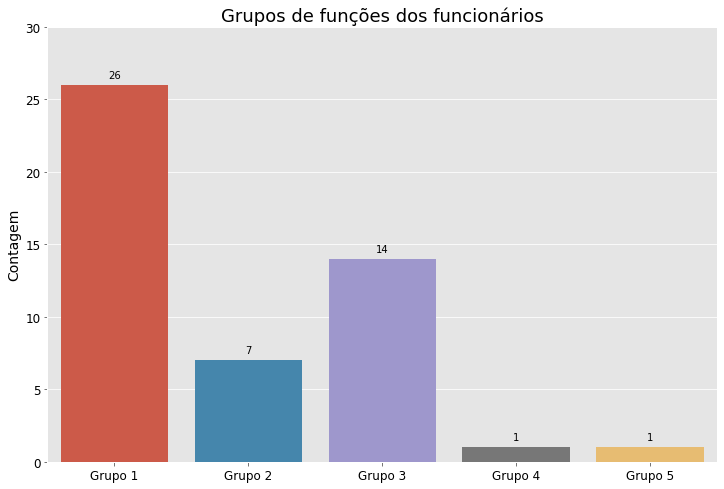

In [12]:
#Plotando o gráfico
plt.figure(figsize=(12,8))

with plt.style.context('ggplot'):
  ax = sns.countplot(x=1, data=dados, 
                   order =["Grupo 1", "Grupo 2", "Grupo 3", "Grupo 4", "Grupo 5"])

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                 textcoords = 'offset points')

#Formatando o gráfico
plt.ylim(0, 30) 
plt.xlabel("", color = "k", size=14)
plt.ylabel("Contagem", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.title("Grupos de funções dos funcionários", fontsize=18)

plt.show()

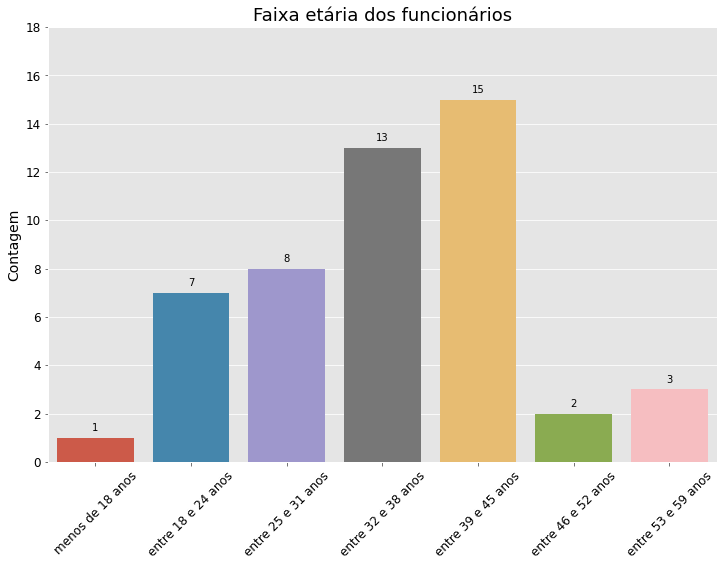

In [13]:
#Plotando o gráfico
plt.figure(figsize=(12,8))

with plt.style.context('ggplot'):
  ax = sns.countplot(x=2, data=dados, 
                   order =["menos de 18 anos", "entre 18 e 24 anos", "entre 25 e 31 anos", "entre 32 e 38 anos", "entre 39 e 45 anos","entre 46 e 52 anos","entre 53 e 59 anos"])

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                 textcoords = 'offset points')

#Formatando o gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation=45)
plt.ylim(0, 18) 
plt.xlabel("", color = "k", size=14)
plt.ylabel("Contagem", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.title("Faixa etária dos funcionários", fontsize=18)

plt.show()

In [14]:
#Calculando a tabela de frequência
frequencia = round(dados[3].value_counts(), 2)
percentual = round(dados[3].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "Gênero"
tabela_frequencia

,Frequência,Percentual
Gênero,,
Masculino,32,65.31
Feminino,15,30.61
Prefiro não declarar,2,4.08


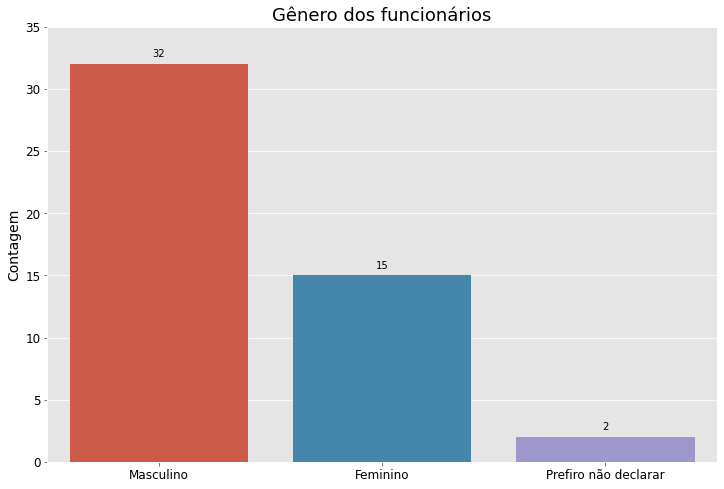

In [15]:
#Plotando o gráfico
plt.figure(figsize=(12,8))

with plt.style.context('ggplot'):
  ax = sns.countplot(x=3, data=dados)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                 textcoords = 'offset points')

#Formatando o gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0, 35) 
plt.xlabel("", color = "k", size=14)
plt.ylabel("Contagem", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.title("Gênero dos funcionários", fontsize=18)

plt.show()

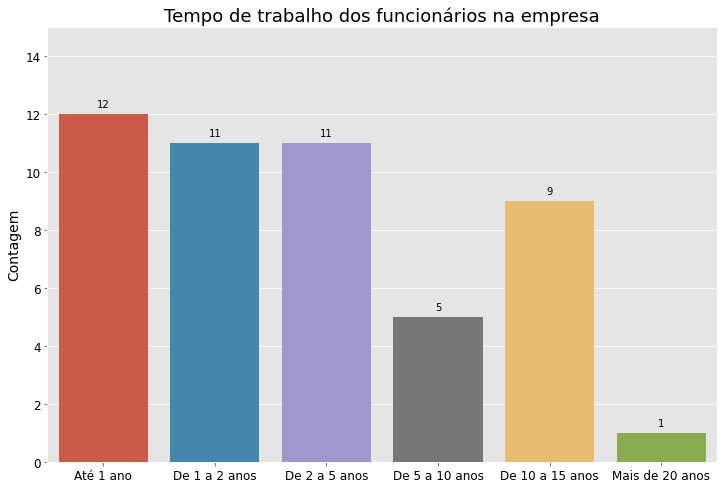

In [16]:
#Plotando o gráfico
plt.figure(figsize=(12,8))

with plt.style.context('ggplot'):
  ax = sns.countplot(x=4, data=dados, 
                     order =["Até 1 ano", "De 1 a 2 anos", "De 2 a 5 anos", "De 5 a 10 anos", "De 10 a 15 anos", "Mais de 20 anos"])

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                 textcoords = 'offset points')

#Formatando o gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0, 15) 
plt.xlabel("", color = "k", size=14)
plt.ylabel("Contagem", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.title("Tempo de trabalho dos funcionários na empresa", fontsize=18)

plt.show()

*** 
Conclusões:
- A empresa é composta em sua maioria por funcionários do Grupo 1 de funções, e em sua minoria por funcionários dos Grupos 4 e 5. É de se esperar que em uma empresa existam menos funcionários em cargos mais altos, ainda mais se tratando de uma empresa com apenas 49 funcionários.
- Cerca de um terço dos funcionários (15 funcionários) tem idade entre 39 e 45 anos. 13 tem idade entre 32 e 28 anos, e 8 tem entre 25 e 31 anos.
- Os funcionários com idade maior que 46 anos e com menos de 18 anos totalizam 6 duncionários.
- Dos funcionários da amostra, 32 declararam o gênero como masculino, 15 declararam o gênero como feminino e apenas 2 preferiram não declarar.
- A desigualdade entre o número de funcionários do gênero masculino e feminino é algo a se considerar.
- Apenas um funcionário trabalha na empresa há mais de 20 anos.
- A maior parte dos funcionários (34 funcionários) foram contratados nos últimos 5 anos.
***

# Respondendo algumas questões...

### Existe alguma diferença entre os gêneros em cada grupo de funções?

In [17]:
frequencia_cruzada = pd.crosstab(dados[1], dados[3])

frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Gênero", axis=1, inplace = True)

frequencia_cruzada.round(2)

Gênero,Feminino,Masculino,Prefiro não declarar
Em qual grupo sua função está?,,,
Grupo 1,4,20,2
Grupo 2,4,3,0
Grupo 3,7,7,0
Grupo 4,0,1,0
Grupo 5,0,1,0


- Nos grupos com funções mais altas na empresa, os funcionários são apenas do gênero masculino.
- Nos Grupos 2 e 3 existe uma igualdade entre a quantidade de funcionários do gênero masculino e feminino.
- No Grupo 1, que apresenta funções tidas como "masculinas", dos 26 funcionários, apenas 4 são do gênero feminino.

### E em relação à faixa etária dos funcionários?

In [18]:
frequencia_cruzada = pd.crosstab(dados[2], dados[1])

frequencia_cruzada.rename_axis("Faixa etária", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=1, inplace = True)

frequencia_cruzada.round(2)

Em qual grupo sua função está?,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5
Faixa etária,,,,,
entre 18 e 24 anos,2,4,1,0,0
entre 25 e 31 anos,3,1,4,0,0
entre 32 e 38 anos,6,2,5,0,0
entre 39 e 45 anos,10,0,3,1,1
entre 46 e 52 anos,2,0,0,0,0
entre 53 e 59 anos,2,0,1,0,0
menos de 18 anos,1,0,0,0,0


- Nos cargos mais altos da empresa, os funcionários têm entre 39 e 45 anos.
- Os funcionários mais velhos, com idade entre 53 e 59 anos, estão nos Grupos 1 e 3.

### E em relação ao tempo de trabalho na empresa?

In [19]:
frequencia_cruzada = pd.crosstab(dados[4], dados[1])

frequencia_cruzada.rename_axis("Tempo de trabalho na empresa", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Gênero", axis=1, inplace = True)

frequencia_cruzada.round(2)

Gênero,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5
Tempo de trabalho na empresa,,,,,
Até 1 ano,8,2,1,1,0
De 1 a 2 anos,5,3,3,0,0
De 10 a 15 anos,3,1,4,0,1
De 2 a 5 anos,5,1,5,0,0
De 5 a 10 anos,4,0,1,0,0
Mais de 20 anos,1,0,0,0,0


- É interessante notar que o funcionário do Grupo 4 foi contratado recentemente.
- Já o funcionário do Grupo 5, tem de 10 a 15 anos na empresa.
- Dos 26 funcionários do Grupo 1, 18 tem menos de 5 anos de trabalho na empresa.
- Os Grupos 1 e 3 concentram o maior número de funcionários com mais tempo na empresa.
- As funções do Grupo 1 talvez tenham mais rotatividade.

### Será que a empresa recebe melhor ou pior os funcionários de algum grupo?

In [20]:
frequencia = round(dados[7].value_counts(), 2)
percentual = round(dados[7].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "Como você considera que a empresa te recebeu quando você entrou?"
tabela_frequencia

,Frequência,Percentual
Como você considera que a empresa te recebeu quando você entrou?,,
5,39,79.59
3,5,10.20
4,3,6.12
2,2,4.08


In [21]:
frequencia_cruzada = pd.crosstab(dados[1], dados[7])

frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Como você considera que a empresa te recebeu quando você entrou?", axis=1, inplace = True)

frequencia_cruzada.round(2)

Como você considera que a empresa te recebeu quando você entrou?,2,3,4,5
Em qual grupo sua função está?,,,,
Grupo 1,1,2,2,21
Grupo 2,1,0,1,5
Grupo 3,0,3,0,11
Grupo 4,0,0,0,1
Grupo 5,0,0,0,1


- Cerca de 80% dos funcionários da amostra declararam terem sido muito bem recebidos quando entraram na empresa independente do grupo de funções.
- O maior descontentamento está entre os funcionários do Grupo 1 e 2.
- Os funcionários de cargos mais altos declararam terem sido muito bem recebidos.

### Qual eram as expectativas dos funcionários quando foram trabalhar na empresa?

In [22]:
#Importando as bibliotecas
import nltk

#Fazendo o download necessário
nltk.download(["averaged_perceptron_tagger", "floresta", "mac_morpho", "machado", "punkt", "stopwords", "wordnet", "words"])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

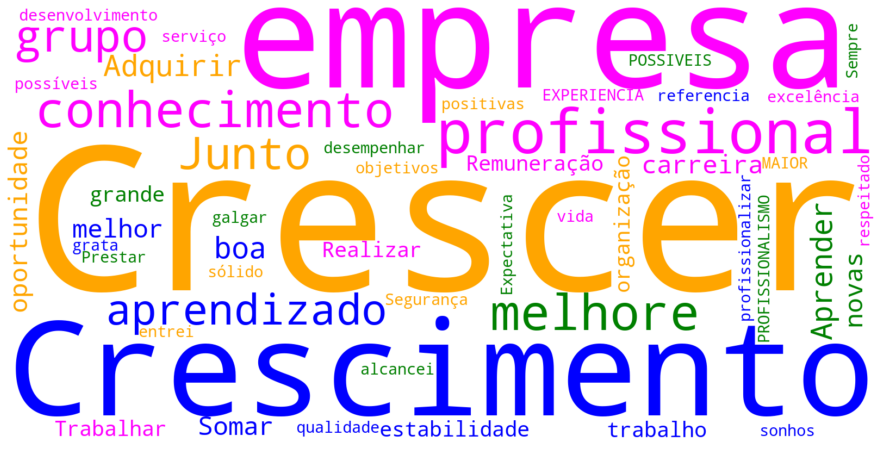

In [23]:
#Importando as bibliotecas
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words("portuguese") + list(punctuation))

dados.dropna(subset=[5], axis=0, inplace = True)

expectativas = dados[5]

#Colocando todas as linhas em apenas uma string e separadas por um espaço " "
expectativas_juntas = " ".join(q for q in expectativas)

#Existem algumas palavras que não contidas neste conjunto da biblioteca, 
#sendo assim, as principais palavras não contidas no conjunto serão atribuídas à variável "stopwords"

#Retirando as stopwords
stopwords = nltk.corpus.stopwords.words("portuguese")
adiciona_stopwords = ["pois", "desde", "coisas", "todos", "dentro", "muitos", "Impresa", "bom", "esperava", "ser"]
stopwords = stopwords + adiciona_stopwords

#Definindo o mapa de cores
cmap = ListedColormap (["blue", "magenta", "green", "orange"])

#Gerando a nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50, colormap=cmap, width=1600, height=800).generate(expectativas_juntas)

#Gerando a imagem
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()

A partir da nuvem de palavras, é possível observar que as expectativas dos funcionários quando foram trabalhar na empresa eram sobretudo crescimento profissional, aprendizado e adquirir conhecimento.

### Será que essas expectativas foram alcançadas?

In [24]:
frequencia = round(dados[6].value_counts(), 2)
percentual = round(dados[6].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "Considerando suas expectativas, você considera que trabalhar aqui é:"
tabela_frequencia

,Frequência,Percentual
"Considerando suas expectativas, você considera que trabalhar aqui é:",,
É o que esperava,21,43.75
É muito melhor do que esperava,11,22.92
É melhor do que esperava,8,16.67
É pior que esperava,7,14.58
É muito pior do que esperava,1,2.08


In [25]:
frequencia_cruzada = pd.crosstab(dados[1], dados[6])

frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Considerando suas expectativas, você considera que trabalhar aqui é:", axis=1, inplace = True)

frequencia_cruzada.round(2)

"Considerando suas expectativas, você considera que trabalhar aqui é:",É melhor do que esperava,É muito melhor do que esperava,É muito pior do que esperava,É o que esperava,É pior que esperava
Em qual grupo sua função está?,,,,,
Grupo 1,5,5,0,12,3
Grupo 2,0,2,1,2,2
Grupo 3,3,2,0,7,2
Grupo 4,0,1,0,0,0
Grupo 5,0,1,0,0,0


- Para a maior parte dos funcionários, o trabalho está dentro do esperado.
- Para os funcionários nos cargos mais altos, o trabalho é muito melhor do que o esperado.
- Apenas um funcionário declarou que é muito pior do que o esperado e ele está no Grupo 2.
- O grupo em que o trabalho mais superou as expectativas foi o Grupo 1.

## Como está o conhecimento sobre o andamento da empresa, metas e objetivos?

In [26]:
frequencia = round(dados[8].value_counts(), 2)
percentual = round(dados[8].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "Você conhece os procedimentos da sua função?"
tabela_frequencia

,Frequência,Percentual
Você conhece os procedimentos da sua função?,,
5,28,58.33
4,16,33.33
3,3,6.25
2,1,2.08


In [27]:
frequencia_cruzada = pd.crosstab(dados[1], dados[8])

frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Você conhece os procedimentos da sua função?", axis=1, inplace = True)

frequencia_cruzada.round(2)

Você conhece os procedimentos da sua função?,2,3,4,5
Em qual grupo sua função está?,,,,
Grupo 1,1,2,5,17
Grupo 2,0,1,4,2
Grupo 3,0,0,6,8
Grupo 4,0,0,1,0
Grupo 5,0,0,0,1


- 29 dos 49 funcionários declararam conhecer muito bem os procedimentos da sua função.
- O menor conhecimento foi declarado por um funcionário do Grupo 1.
- Ainda assim, a maioria dos melhores informados sobre os procedimentos de sua função também estão no Grupo 1 (61%).
- Apenas 4 funcionaram responderam 2 e 3, o que significa que 45 responderam 4 e 5, ou sejam, mais de 90% conhece bem os procedimentos da sua função.

In [28]:
frequencia = round(dados[9].value_counts(), 2)
percentual = round(dados[9].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "As metas e objetivos da sua área são claras para você?"
tabela_frequencia

,Frequência,Percentual
As metas e objetivos da sua área são claras para você?,,
5,32,66.67
4,7,14.58
3,7,14.58
2,1,2.08
1,1,2.08


In [29]:
frequencia_cruzada = pd.crosstab(dados[1], dados[9])

frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("As metas e objetivos da sua área são claras para você?", axis=1, inplace = True)

frequencia_cruzada.round(2)

As metas e objetivos da sua área são claras para você?,1,2,3,4,5
Em qual grupo sua função está?,,,,,
Grupo 1,1,1,2,3,18
Grupo 2,0,0,3,2,2
Grupo 3,0,0,2,1,11
Grupo 4,0,0,0,1,0
Grupo 5,0,0,0,0,1


- Apenas duas pessoas, ambas do Grupo 1, declararam não ter muita clareza sobre as metas e objetivos da sua área.
- 40 dos 49 funcionários sabem com clareza as metas e objetivos de suas respectivas áreas.
- Os funcionários que tem mais clareza sobre as metas e objetivos estão nos Grupos 1 e 3.

In [30]:
frequencia = round(dados[10].value_counts(), 2)
percentual = round(dados[10].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "Como é para você acompanhar o andamento das suas metas?"
tabela_frequencia

,Frequência,Percentual
Como é para você acompanhar o andamento das suas metas?,,
5,17,35.42
4,14,29.17
3,9,18.75
2,5,10.42
1,3,6.25


In [31]:
frequencia_cruzada = pd.crosstab(dados[1], dados[10])

frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Como é para você acompanhar o andamento das suas metas?", axis=1, inplace = True)

frequencia_cruzada.round(2)

Como é para você acompanhar o andamento das suas metas?,1,2,3,4,5
Em qual grupo sua função está?,,,,,
Grupo 1,2,2,5,6,10
Grupo 2,0,2,1,2,2
Grupo 3,1,0,3,6,4
Grupo 4,0,1,0,0,0
Grupo 5,0,0,0,0,1


- Funcionários do Grupo 1 são os que mais têm dificuldades para acompanhar o andamento das suas metas.
- O funcionário do Grupo 4 declarou não ter tanta clareza sobre os andamentos das suas metas mesmo tendo um cargo mais alto na empresa.
- Um número menor de funcionários tem facilidade para acompanhar o andamento das suas metas, 32 dos 49 funcionários.
- As pessoas com maior facilidade em acompanhar o andamento das suas metas estão nos Grupos 1 e 3.

## Os funcionários que se dizem mais informados se informam por mais de um meio? E os menos informados?

In [32]:
frequencia = round(dados[11].value_counts(), 2)
percentual = round(dados[11].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "Quanto você se considera informado sobre o que acontece na empresa atualmente?"
tabela_frequencia

,Frequência,Percentual
Quanto você se considera informado sobre o que acontece na empresa atualmente?,,
3,21,43.75
4,14,29.17
2,7,14.58
5,5,10.42
1,1,2.08


In [33]:
frequencia_cruzada = pd.crosstab(dados[1], dados[11])

frequencia_cruzada.rename_axis("Em qual grupo sua função está?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Quanto você se considera informado sobre o que acontece na empresa atualmente?", axis=1, inplace = True)

frequencia_cruzada.round(2)

Quanto você se considera informado sobre o que acontece na empresa atualmente?,1,2,3,4,5
Em qual grupo sua função está?,,,,,
Grupo 1,1,3,13,6,2
Grupo 2,0,2,3,1,1
Grupo 3,0,1,5,7,1
Grupo 4,0,1,0,0,0
Grupo 5,0,0,0,0,1


In [34]:
dados["Como se informa"] = dados[13]+dados[14]+dados[15]+dados[16]+dados[17]

In [35]:
frequencia = round(dados["Como se informa"].value_counts(), 2)
percentual = round(dados["Como se informa"].value_counts(normalize = True) * 100, 2)
tabela_frequencia = pd.DataFrame({"Frequência" : frequencia, "Percentual" : percentual})
index = tabela_frequencia.index
index.name = "Por quantos meios você se informa?"
tabela_frequencia

,Frequência,Percentual
Por quantos meios você se informa?,,
1,21,43.75
2,12,25.00
3,9,18.75
4,6,12.50


In [36]:
frequencia_cruzada = pd.crosstab(dados["Como se informa"], dados[11]) 

frequencia_cruzada.rename_axis("Por quantos meios você se informa?", axis=0, inplace = True)
frequencia_cruzada.rename_axis("Quanto você se considera informado sobre o que acontece na empresa atualmente?", axis=1, inplace = True)

frequencia_cruzada

Quanto você se considera informado sobre o que acontece na empresa atualmente?,1,2,3,4,5
Por quantos meios você se informa?,,,,,
1,0,3,6,9,3
2,1,4,7,0,0
3,0,0,7,2,0
4,0,0,1,3,2


In [37]:
gestor_lider = (dados[13] == 1).sum()
colegas = (dados[14] == 1).sum()
e_mail = (dados[15] == 1).sum()
informativos_empresa = (dados[16] == 1).sum()
whatsapp = (dados[17] == 1).sum()

print(f"Número de funcionários que se informam pelo gestor/líder: {gestor_lider}")
print(f"Número de funcionários que se informam pelos colegas: {colegas}")
print(f"Número de funcionários que se informam por e-mail: {e_mail}")
print(f"Número de funcionários que se informam pelos informativos da empresa: {informativos_empresa}")
print(f"Número de funcionários que se informam pelo WhatsApp: {whatsapp}")

Número de funcionários que se informam pelo gestor/líder: 36
Número de funcionários que se informam pelos colegas: 18
Número de funcionários que se informam por e-mail: 11
Número de funcionários que se informam pelos informativos da empresa: 16
Número de funcionários que se informam pelo WhatsApp: 15


In [38]:
#Selecionando os funcionários que se informam por apenas um meio e esse meio é o gestor/líder
apenas_um_meio_gestor = len(dados.loc[(dados[13] == 1) & (dados["Como se informa"] == 1)])
apenas_um_meio_gestor

15

In [39]:
#Selecionando apenas os funcionários que se informam por apenas um meio
um_meio = dados.loc[(dados["Como se informa"] == 1)]

- O funcionário do Grupo 4 não se considera bem informado sobre o que acontece na empresa atualmente. Isso é interessante considerando que esse grupo engloba as funções de auditoria, coordenador e supervisor.
- É bem interessante observar que a maior parte dos funcionários se informa por apenas um meio.
- E a maioria dos funcionários se informa pelo gestor/líder.
- Isso pode indicar que existe uma relação bem próxima entre os funcionários e o gestores/líderes.
- Seria interessante investigar a idade dos funcionários que se informam dessa maneira e o grupo.
- Selecionando os funcionários que se informam pelo gestor/líder e esse é o único meio pelo qual se informam, temos 16 funcionários.
- Apenas 11 funcionários se informam por e-mail, o que pode indicar, por exemplo, que existe uma falha da empresa no que diz respeito aos e-mails corporativos, que não existe interesse nesse tipo de comunicação ou que os funcionários não leem os e-mails da empresa.
- Outro ponto interessante é que mesmo se informando por apenas um meio, cerca de 40% dos funcionários se consideram informados sobre o que acontece na empresa atualmente.

## Qual o sentimento do funcionário em relação a empresa e como ele enxerga o sentimento dos outros funcionários?

In [40]:
frequencia_cruzada = pd.crosstab(dados[21], dados[22], rownames=["Sentimento que melhor representa o momento atual da empresa na visão da maioria dos funcionários"], 
                                 colnames=["Sentimento melhor representa o momento atual da empresa para você"])
frequencia_cruzada.round(2)

Sentimento melhor representa o momento atual da empresa para você,"Afastamento (passividade, saudosismo)","Choque (defensiva, medo)","Empolgação (comprometimento, determinação)","Insegurança (confusão, desânimo)","Interesse (esperança, vontade)","Resistência (raiva, críticas)"
Sentimento que melhor representa o momento atual da empresa na visão da maioria dos funcionários,,,,,,
"Afastamento (passividade, saudosismo)",1,0,0,1,1,0
"Empolgação (comprometimento, determinação)",0,0,8,1,3,0
"Insegurança (confusão, desânimo)",1,1,2,3,2,1
"Interesse (esperança, vontade)",0,0,7,3,13,0


- Aqui é interessante olhar o funcionários que tem um sentimento bom em relação ao momento atual da empresa, mas considera que não é assim para a maioria dos funcionários, ou o contrário.
- Dois funcionários tem o sentimento de empolgação, mas enxerga que a maioria dos funcionários tem o sentimento de insegurança.
- Um funcionário tem o sentimento de interesse e enxerga que a maioria dos funcionários tem o sentimento de afastamento.
- Dois funcionários tem o sentimento de interesse e enxerga que a maioria dos funcionários tem o sentimento de insegurança.
- Um funcionário tem o sentimento de insegurança e enxerga que a maioria dos funcionários tem o sentimento de empolgação.
- Três funcionários tem o sentimento de insegurança e enxerga que a maioria dos funcionários tem o sentimento de interesse.
- Esta diferença pode ser devido a algum episódio isolado com algum funcionário ou algum acontecimento em algum grupo específico.

## Nota de engajamento

In [41]:
dados[20].describe()

count    48.000000
mean      3.993012
std       0.580954
min       2.566595
25%       3.679239
50%       4.114105
75%       4.435227
max       4.894444
Name: 20, dtype: float64

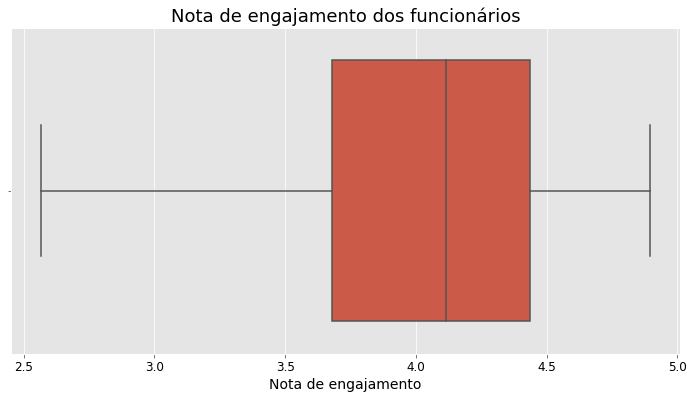

In [42]:
#Plotando o gráfico
plt.figure(figsize=(12,6))

with plt.style.context('ggplot'):
  ax = sns.boxplot(x=dados[20])

#Formatando o gráfico
plt.xlabel("Nota de engajamento", color = "k", size=14)
plt.ylabel("", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.title("Nota de engajamento dos funcionários", fontsize=18)

plt.show()

In [8]:
#Criando as classes do engajamento
classes = [2.5, 3, 3.5, 4, 4.5, 5]
labels = ["de 2.5 a 3", "de 3 a 3.5", "de 3.5 a 4", "de 4 a 4.5", "de 4.5 a 5"]

dados["Engajamento"] = pd.cut(x = dados[20], bins = classes, labels = labels, include_lowest = True)

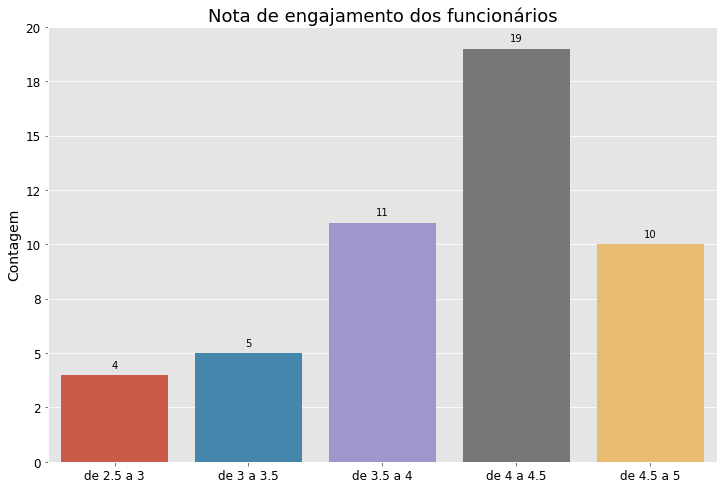

In [9]:
#Plotando o gráfico
plt.figure(figsize=(12,8))

with plt.style.context('ggplot'):
  ax = sns.countplot(x="Engajamento", data=dados)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                 textcoords = 'offset points')

#Formatando o gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0, 20) 
plt.xlabel("", color = "k", size=14)
plt.ylabel("Contagem", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.title("Nota de engajamento dos funcionários", fontsize=18)

plt.show()

Para tirar conclusões mais precisas, o ideal seria cruzar a nota de engajamento com as perguntas abaixo:

- Você conhece os procedimentos (tarefas, processos, conhecimentos) da sua função?
- As metas e objetivos da sua área são claras para você?
- Como é para você acompanhar o andamento das suas metas?
- Quanto você se considera informado sobre o que acontece na empresa atualmente?
- A relação entre o seu trabalho e os resultados da empresa é clara?
- E para você, qual sentimento melhor representa esse momento atual da empresa?

Isso porque como o funcionário se sente na empresa, metas e objetivos claros, sentir que seu trabalho é uma contribuição importante para a empresa, saber quais as expectativas sobre o seu trabalho, estar informado sobre o que está acontecendo, são fatores importantes para o engajamento do funcionário.



As conclusão abaixo também são importantes quando se trata de engajamento.

- É bem interessante observar que a maior parte dos funcionários se informa por apenas um meio.
- E a maioria dos funcionários se informa pelo gestor/líder.
- Isso pode indicar que existe uma relação bem próxima entre os funcionários e o gestores/líderes.

Os líderes tem papel essencial no engajamento dos funcionários.